In [4]:
import numpy as np
from matplotlib import pyplot as plt
import importlib
import wrftools as wrf
import genutils as gu
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
TT = gu.TicTocGenerator()

from scipy.signal import convolve2d

In [16]:
run='run_CTRL_rr'
flist=wrf.getflist(run)
fname=flist[24*5]
V=wrf.getWRF(run,fname,'V',z=0)
lon,lat=wrf.getCoords(run,fname)

(801, 801) (801, 801)


(-100.0, 100.0)

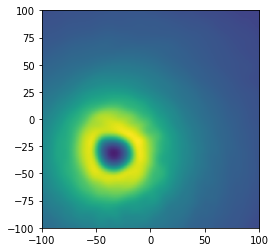

In [21]:
def smooth2d(x,N):
    #smooth by layer
    if len(x.shape)==3:
        xsmz=[convolve2d(x[:,:,z], np.ones((N,N))/(N*N),mode='same') for z in range(0,x.shape[2])]
        xsm=np.stack(xsmz,axis=2)
    else:
        xsm=convolve2d(x, np.ones((N,N))/(N*N),mode='same')
        return(xsm)

Vsm=smooth2d(V,7)

print(V.shape,Vsm.shape)

gu.imshowxy(lon/1000,lat/1000,Vsm[:,:])
plt.xlim(-100,100)
plt.ylim(-100,100)